In [1]:
import numpy as np
import pandas as pd
import statistics as st
from scipy import stats

# Task 1

In [2]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1465896,244316,593,412,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,3123904,390488,734,532,4,4,4,yes,no,no,no,yes,3,no,furnished
2,1519896,379974,498,763,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,1152112,288028,382,754,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,887292,221823,503,441,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Univariate Analysis

In [3]:
mean = df['area'].mean()
std = df['area'].std()
variance = std**2
zs = abs(stats.zscore(df['area']))
print("\nMean: ", mean, "\nStandard Deviation: ", std, "\nVariance: ", variance, "\nZ-Score: ", zs)


Mean:  293234.97247706424 
Standard Deviation:  113027.43454065922 
Variance:  12775200958.843004 
Z-Score:  0      0.433204
1      0.861228
2      0.768121
3      0.046111
4      0.632391
         ...   
540    0.923588
541    0.457769
542    0.983823
543    0.653937
544    1.001402
Name: area, Length: 545, dtype: float64


### Classifier on Dataset

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

column = ['mainroad', 'guestroom', 'basement', 'hotwaterheating','airconditioning', 'prefarea', 'furnishingstatus']
df[column] = df[column].apply(LabelEncoder().fit_transform)
x = df.drop(['furnishingstatus'], axis = 1)
y = df['furnishingstatus']

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=51)

c1 = KNeighborsClassifier()
c1.fit(X_train, y_train)
p = c1.predict(X_test)
c1.score(X_test,y_test)
print ("Accuracy : " , accuracy_score(y_test,p)*100)  
print("Report : \n", classification_report(y_test, p))
print("F1 Score : ",f1_score(y_test, p, average='macro')*100)

Accuracy :  37.61467889908257
Report : 
               precision    recall  f1-score   support

           0       0.36      0.52      0.43        25
           1       0.40      0.47      0.43        45
           2       0.35      0.18      0.24        39

    accuracy                           0.38       109
   macro avg       0.37      0.39      0.36       109
weighted avg       0.37      0.38      0.36       109

F1 Score :  36.402969078712346


### Normalizing the Data

In [77]:
arr = np.array(df.drop(['furnishingstatus'], axis=1))
std = np.std(arr, axis = 0)
m = np.mean(arr, axis = 0)
one = np.ones(arr.shape)
mean = m * one
z = arr - mean
Z = z/std
print(Z)

[[ 0.61079403 -0.4332038   0.36341156 ...  1.4726183   1.51769249
   1.80494113]
 [ 3.09829406  0.86122784  1.3147115  ...  1.4726183   2.67940935
  -0.55403469]
 [ 0.69180993  0.76812072 -0.27753521 ... -0.67906259  1.51769249
   1.80494113]
 ...
 [-1.04196023 -0.98382342 -1.11413941 ... -0.67906259 -0.80574124
  -0.55403469]
 [-0.48702535  0.65393742  0.20823497 ... -0.67906259 -0.80574124
  -0.55403469]
 [ 0.84989894  1.00140215 -0.08187778 ... -0.67906259 -0.80574124
  -0.55403469]]


### Applying classifier on Normalized Data

In [80]:
y = df['furnishingstatus']

X_train,X_test,y_train,y_test = train_test_split(Z,y,test_size=0.2,random_state=51)

c1 = KNeighborsClassifier()
c1.fit(X_train, y_train)
p = c1.predict(X_test)
c1.score(X_test,y_test)
print ("Accuracy : " , accuracy_score(y_test,p)*100)
print("Report : \n", classification_report(y_test, p))
print("F1 Score : ",f1_score(y_test, p, average='macro')*100)

Accuracy :  48.69724770642202
Report : 
               precision    recall  f1-score   support

           0       0.30      0.52      0.38        25
           1       0.45      0.42      0.44        45
           2       0.33      0.21      0.25        39

    accuracy                           0.37       109
   macro avg       0.36      0.38      0.36       109
weighted avg       0.38      0.37      0.36       109

F1 Score :  47.770093478004235


### Was normalization helpful? If yes then which one outperformed rest and why?
#### Classifier applied on the normalized data outperformed the original data because it gives equal weight to each feature so that no single feature affects the performance of the model into a single direction

## Plot the area w.r.t to its independent variables in 2D and 3D

### 2D

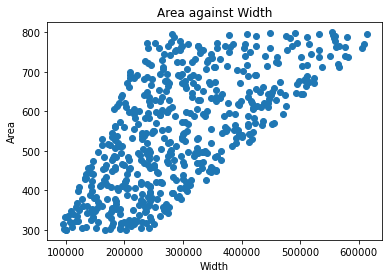

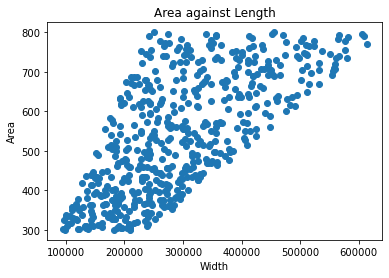

In [15]:
import matplotlib.pyplot as plt
plt.scatter(df['area'], df['width'])
plt.title("Area against Width") 
plt.xlabel("Width") 
plt.ylabel("Area") 
plt.show()

plt.scatter(df['area'], df['length'])
plt.title("Area against Length") 
plt.xlabel("Width") 
plt.ylabel("Area") 
plt.show()

### 3D

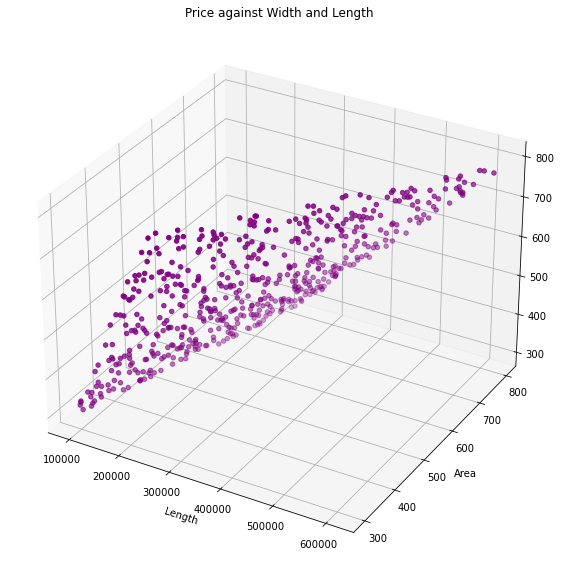

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,10))
axis = fig.add_subplot( projection='3d')
axis.scatter(df['area'], df['width'], df['length'], c = 'purple')
plt.title("Price against Width and Length") 
plt.xlabel("Length") 
plt.ylabel("Area")
plt.show()

## Find the covariance &amp; correlation matrix of the normalized data

In [20]:
covariance = np.cov(df['price'], df['area'], bias=True)
print("\nCovariance Matrix: \n", covariance)


Covariance Matrix: 
 [[4.44270069e+11 4.57497125e+10]
 [4.57497125e+10 1.27517602e+10]]


In [21]:
corelation = np.corrcoef(df['price'], df['area'])
print("\nCorelation Matrix: \n", corelation)


Corelation Matrix: 
 [[1.        0.6078267]
 [0.6078267 1.       ]]


## Find the correlation of length and area and plot it

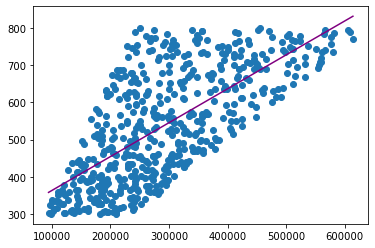

In [23]:
plt.scatter(df['area'], df['length'])
plt.plot(np.unique(df['area']), np.poly1d(np.polyfit(df['area'], df['length'], 1))(np.unique(df['area'])), color ='purple')

# Task 2

In [13]:
list1 = ['A','B','C','D','E']
str1 = ""
prob = []
for i in list1:
    str1 = ""
    str1 += i
    str3 = str1
    for j in list1:
        str1 = str3
        str1 += j
        str2 = str1
        for k in list1:
            str1 = str2
            str1 += k
            prob.append(str1)
prob

['AAA',
 'AAB',
 'AAC',
 'AAD',
 'AAE',
 'ABA',
 'ABB',
 'ABC',
 'ABD',
 'ABE',
 'ACA',
 'ACB',
 'ACC',
 'ACD',
 'ACE',
 'ADA',
 'ADB',
 'ADC',
 'ADD',
 'ADE',
 'AEA',
 'AEB',
 'AEC',
 'AED',
 'AEE',
 'BAA',
 'BAB',
 'BAC',
 'BAD',
 'BAE',
 'BBA',
 'BBB',
 'BBC',
 'BBD',
 'BBE',
 'BCA',
 'BCB',
 'BCC',
 'BCD',
 'BCE',
 'BDA',
 'BDB',
 'BDC',
 'BDD',
 'BDE',
 'BEA',
 'BEB',
 'BEC',
 'BED',
 'BEE',
 'CAA',
 'CAB',
 'CAC',
 'CAD',
 'CAE',
 'CBA',
 'CBB',
 'CBC',
 'CBD',
 'CBE',
 'CCA',
 'CCB',
 'CCC',
 'CCD',
 'CCE',
 'CDA',
 'CDB',
 'CDC',
 'CDD',
 'CDE',
 'CEA',
 'CEB',
 'CEC',
 'CED',
 'CEE',
 'DAA',
 'DAB',
 'DAC',
 'DAD',
 'DAE',
 'DBA',
 'DBB',
 'DBC',
 'DBD',
 'DBE',
 'DCA',
 'DCB',
 'DCC',
 'DCD',
 'DCE',
 'DDA',
 'DDB',
 'DDC',
 'DDD',
 'DDE',
 'DEA',
 'DEB',
 'DEC',
 'DED',
 'DEE',
 'EAA',
 'EAB',
 'EAC',
 'EAD',
 'EAE',
 'EBA',
 'EBB',
 'EBC',
 'EBD',
 'EBE',
 'ECA',
 'ECB',
 'ECC',
 'ECD',
 'ECE',
 'EDA',
 'EDB',
 'EDC',
 'EDD',
 'EDE',
 'EEA',
 'EEB',
 'EEC',
 'EED',
 'EEE']

In [14]:
print(len(prob))

125


In [60]:
prob2 = []
for i in prob:
    c1 = ""
    c2 = ""
    c3 = ""
    c1 = i[0]
    c2 = i[1]
    c3 = i[-1]
    if((c1==c2) or (c1==c3) or (c2==c3)):
        prob2.append(i)
prob2

['AAA',
 'AAB',
 'AAC',
 'AAD',
 'AAE',
 'ABA',
 'ABB',
 'ACA',
 'ACC',
 'ADA',
 'ADD',
 'AEA',
 'AEE',
 'BAA',
 'BAB',
 'BBA',
 'BBB',
 'BBC',
 'BBD',
 'BBE',
 'BCB',
 'BCC',
 'BDB',
 'BDD',
 'BEB',
 'BEE',
 'CAA',
 'CAC',
 'CBB',
 'CBC',
 'CCA',
 'CCB',
 'CCC',
 'CCD',
 'CCE',
 'CDC',
 'CDD',
 'CEC',
 'CEE',
 'DAA',
 'DAD',
 'DBB',
 'DBD',
 'DCC',
 'DCD',
 'DDA',
 'DDB',
 'DDC',
 'DDD',
 'DDE',
 'DED',
 'DEE',
 'EAA',
 'EAE',
 'EBB',
 'EBE',
 'ECC',
 'ECE',
 'EDD',
 'EDE',
 'EEA',
 'EEB',
 'EEC',
 'EED',
 'EEE']

In [28]:
print(len(prob2))

65


In [29]:
probability = (len(prob2)/len(prob))*100
probability

52.0

In [35]:
prob3 = []
for i in prob:
    c1 = ""
    c2 = ""
    c3 = ""
    c1 = i[0]
    c2 = i[1]
    c3 = i[-1]
    if((c1!=c2) and (c1!=c3) and (c2!=c3)):
        prob3.append(i)
prob3

['ABC',
 'ABD',
 'ABE',
 'ACB',
 'ACD',
 'ACE',
 'ADB',
 'ADC',
 'ADE',
 'AEB',
 'AEC',
 'AED',
 'BAC',
 'BAD',
 'BAE',
 'BCA',
 'BCD',
 'BCE',
 'BDA',
 'BDC',
 'BDE',
 'BEA',
 'BEC',
 'BED',
 'CAB',
 'CAD',
 'CAE',
 'CBA',
 'CBD',
 'CBE',
 'CDA',
 'CDB',
 'CDE',
 'CEA',
 'CEB',
 'CED',
 'DAB',
 'DAC',
 'DAE',
 'DBA',
 'DBC',
 'DBE',
 'DCA',
 'DCB',
 'DCE',
 'DEA',
 'DEB',
 'DEC',
 'EAB',
 'EAC',
 'EAD',
 'EBA',
 'EBC',
 'EBD',
 'ECA',
 'ECB',
 'ECD',
 'EDA',
 'EDB',
 'EDC']

In [36]:
print(len(prob3))

60


In [37]:
probability = (len(prob3)/len(prob))*100
probability

48.0

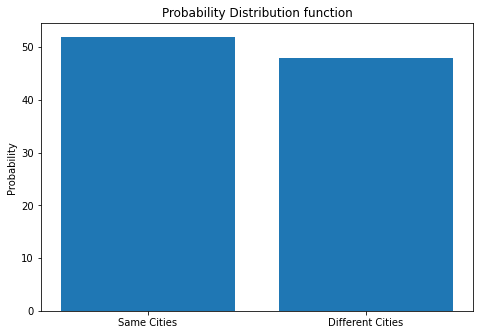

In [52]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Probability')
ax.set_title('Probability Distribution function')
title = ['Same Cities', 'Different Cities']
probs = [52,48]
ax.bar(title,probs)
plt.show()

## Is it a discrete distribution or a continuous one?
#### It is a discrete distribution since the graph is not a curve and the values are discrete numbers

## Is it a univariate or a multivariate problem?
#### It is a univariate problem since no feature is dependant upon another and we are taking only one variable into consideration